<details style="background-color: yellow;">
<ins style="background-color: yellow;"><strong>Tourist arrivals prediction</strong></ins>

Tourism is a very important revenue generation sector for many countries. Some countries entirely depend on tourism because it:

* Creates employment for the youth.
* Generates revenue for the government.
* Develops the infrastructure.

Apart from the economic impact, tourism also has social impacts on any society. This entails effects of host communities of direct and indirect relations to tourists, and interaction with the tourism industry. The social impacts are:

* **Preservation of local culture and heritage** - Many destinations will make a conserved effort to preserve and protect the local culture. Many tourists will visit the destination especially to see its local heritage and culture. It is for this reason that many destinations will make every effort to preserve its heritage as well as culture.

* **Strengthening communities** - Events and festivals of which local residents have been the primary participants and spectators are often rejuvenated and developed in response to tourist interest.

* **Provision of social services** - The tourism industry requires many facilities/ infrastructure to meet the needs of the tourist. This often means that many developments in an area as a result of tourism will be available for use by the locals also. Local people often gained new roads, new sewage systems, new healthcare facilities, and new playgrounds as a result of tourism. This can provide a great boost to their quality of life.

On the other hand, tourism has its negative impacts on any society.

* **Culture Clashes** - Because tourism involves the movement of people to different geographical locations, cultural clashes can take place as a result of differences in cultures, ethnic and religious groups, values, lifestyles, languages, and levels of prosperity.

* **Increase in crime** - The presence of a large number of tourists with a lot of money to spend and often carrying valuables such as cameras and jewelry increases the attraction for criminals and brings with it activities like robbery and drug dealing.

Nonetheless, the good outweighs the bad.
</details>

##### <ins> Business Objective </ins>
##### Provided with tourism data and the rate of their arrivals, we seek out to:
* 1. Find the factors influencing tourism in the data provided. 
* 2. Find the seasons, months and years which are more frequented by tourists.
* 3. Build a predictive model to forecast tourist arrivals for easier planning.


#### <ins> Data Understanding </ins>
#### Import all the libraries that will be used in the notebook.

In [1]:
# Data manipulation libraries
import pandas as pd 
import numpy as np  

# Visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline  

# Scikit-learn algorithms
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Gradient Boosting algorithms
import xgboost as XGB 
import lightgbm as lgb  

In [3]:
df = pd.read_csv("train_df.csv", parse_dates=['date'], index_col=0)
df.head()

,date,tourist_area,spot_facility,tourist_arrivals,area,city,type,category,tourism_index,info,event,weather_index
id,,,,,,,,,,,,
0,2018-08-01,1,A,454,A,A,A,13,1750.0,A,A,40.05
1,2018-08-01,1,B,823,A,A,A,13,1750.0,A,A,40.05
2,2018-08-01,1,C,149,A,A,A,13,1750.0,A,A,40.05
3,2018-08-01,1,D,157,A,A,A,13,1750.0,A,A,40.05
4,2018-08-01,1,E,14,A,A,A,13,1750.0,A,A,40.05



<summary style="color: blue;font-size: 18px; font-weight: bold;text-decoration: underline;"><strong> Data Exploration</strong></summary>

#### We start with:
* Checking the info of the columns to know the data types we are dealing with.
* Check for missing values.
* Check value counts of columns having the object data type. 


In [20]:
# Check for missing values in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132192 entries, 0 to 132191
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              132192 non-null  datetime64[ns]
 1   tourist_area      132192 non-null  int64         
 2   spot_facility     132192 non-null  object        
 3   tourist_arrivals  132192 non-null  int64         
 4   area              132192 non-null  object        
 5   city              132192 non-null  object        
 6   type              132192 non-null  object        
 7   category          132192 non-null  int64         
 8   tourism_index     128200 non-null  float64       
 9   info              132192 non-null  object        
 10  event             132192 non-null  object        
 11  weather_index     91152 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.1+ MB


#### The weather index and tourism index columns seem to have missing values. The tourism index column doesn't seem to offer more insights. We will go ahead and see what it contains. 

In [21]:
df['tourism_index'].nunique()

3609

#### Seems it doesn not have any information related to the business problem. we therefore drop the entire column.

In [22]:
df.drop(columns=['tourism_index'], axis=1, inplace=True)

In [18]:
# Function for returning value counts for any column.
def values(data):
    unique_counts = {}
    for cols in data.columns:
        unique_counts[cols] = data[cols].value_counts()
    return unique_counts

In [19]:
values(df[['spot_facility']])

{'spot_facility': A    16524
 B    16524
 C    16524
 D    16524
 E    16524
 F    16524
 G    16524
 H    16524
 Name: spot_facility, dtype: int64}

In [24]:
values(df[['city']])

{'city': A    46512
 I    26928
 E     7344
 L     7344
 P     7344
 B     4896
 H     4896
 K     4896
 N     4896
 C     2448
 D     2448
 F     2448
 G     2448
 J     2448
 M     2448
 O     2448
 Name: city, dtype: int64}

##### <ins> Explorative Data Analysis </ins>

##### We explore:
* Tourist arrivals across different months and days.
* Tourist arrivals compare accross different towns.
* Tourist arrivals per city.
* Tourist arrivals accross different spot facilities.


In [56]:
def categoricals(data, figsize=(12,6)):
    categories = data.select_dtypes(include="object")
    plt.figure(figsize=figsize)
    for i, items in enumerate(categories.columns):
        plt.subplot(3, 2, i+1)
        sns.countplot(data=data, x=items)
    plt.show()
        

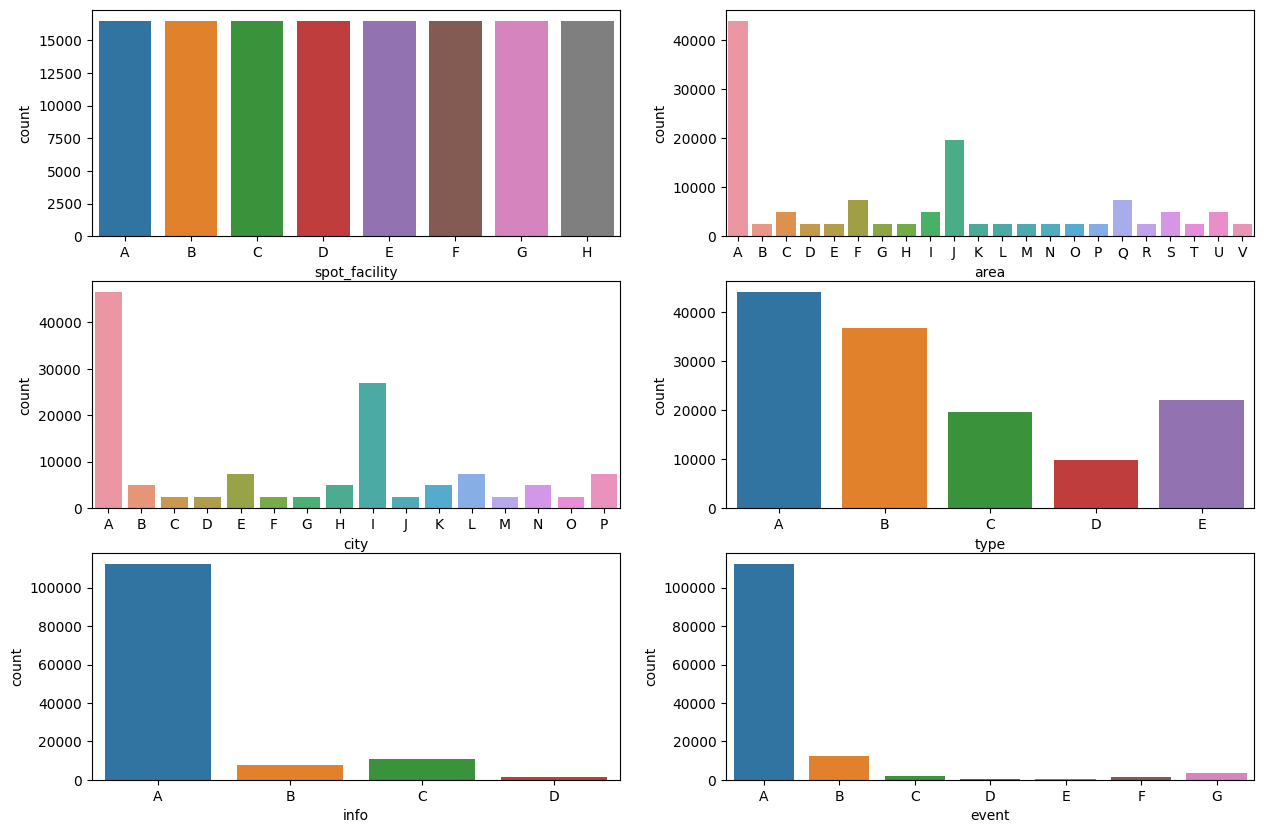

In [59]:
categoricals(df, figsize=(15,10))

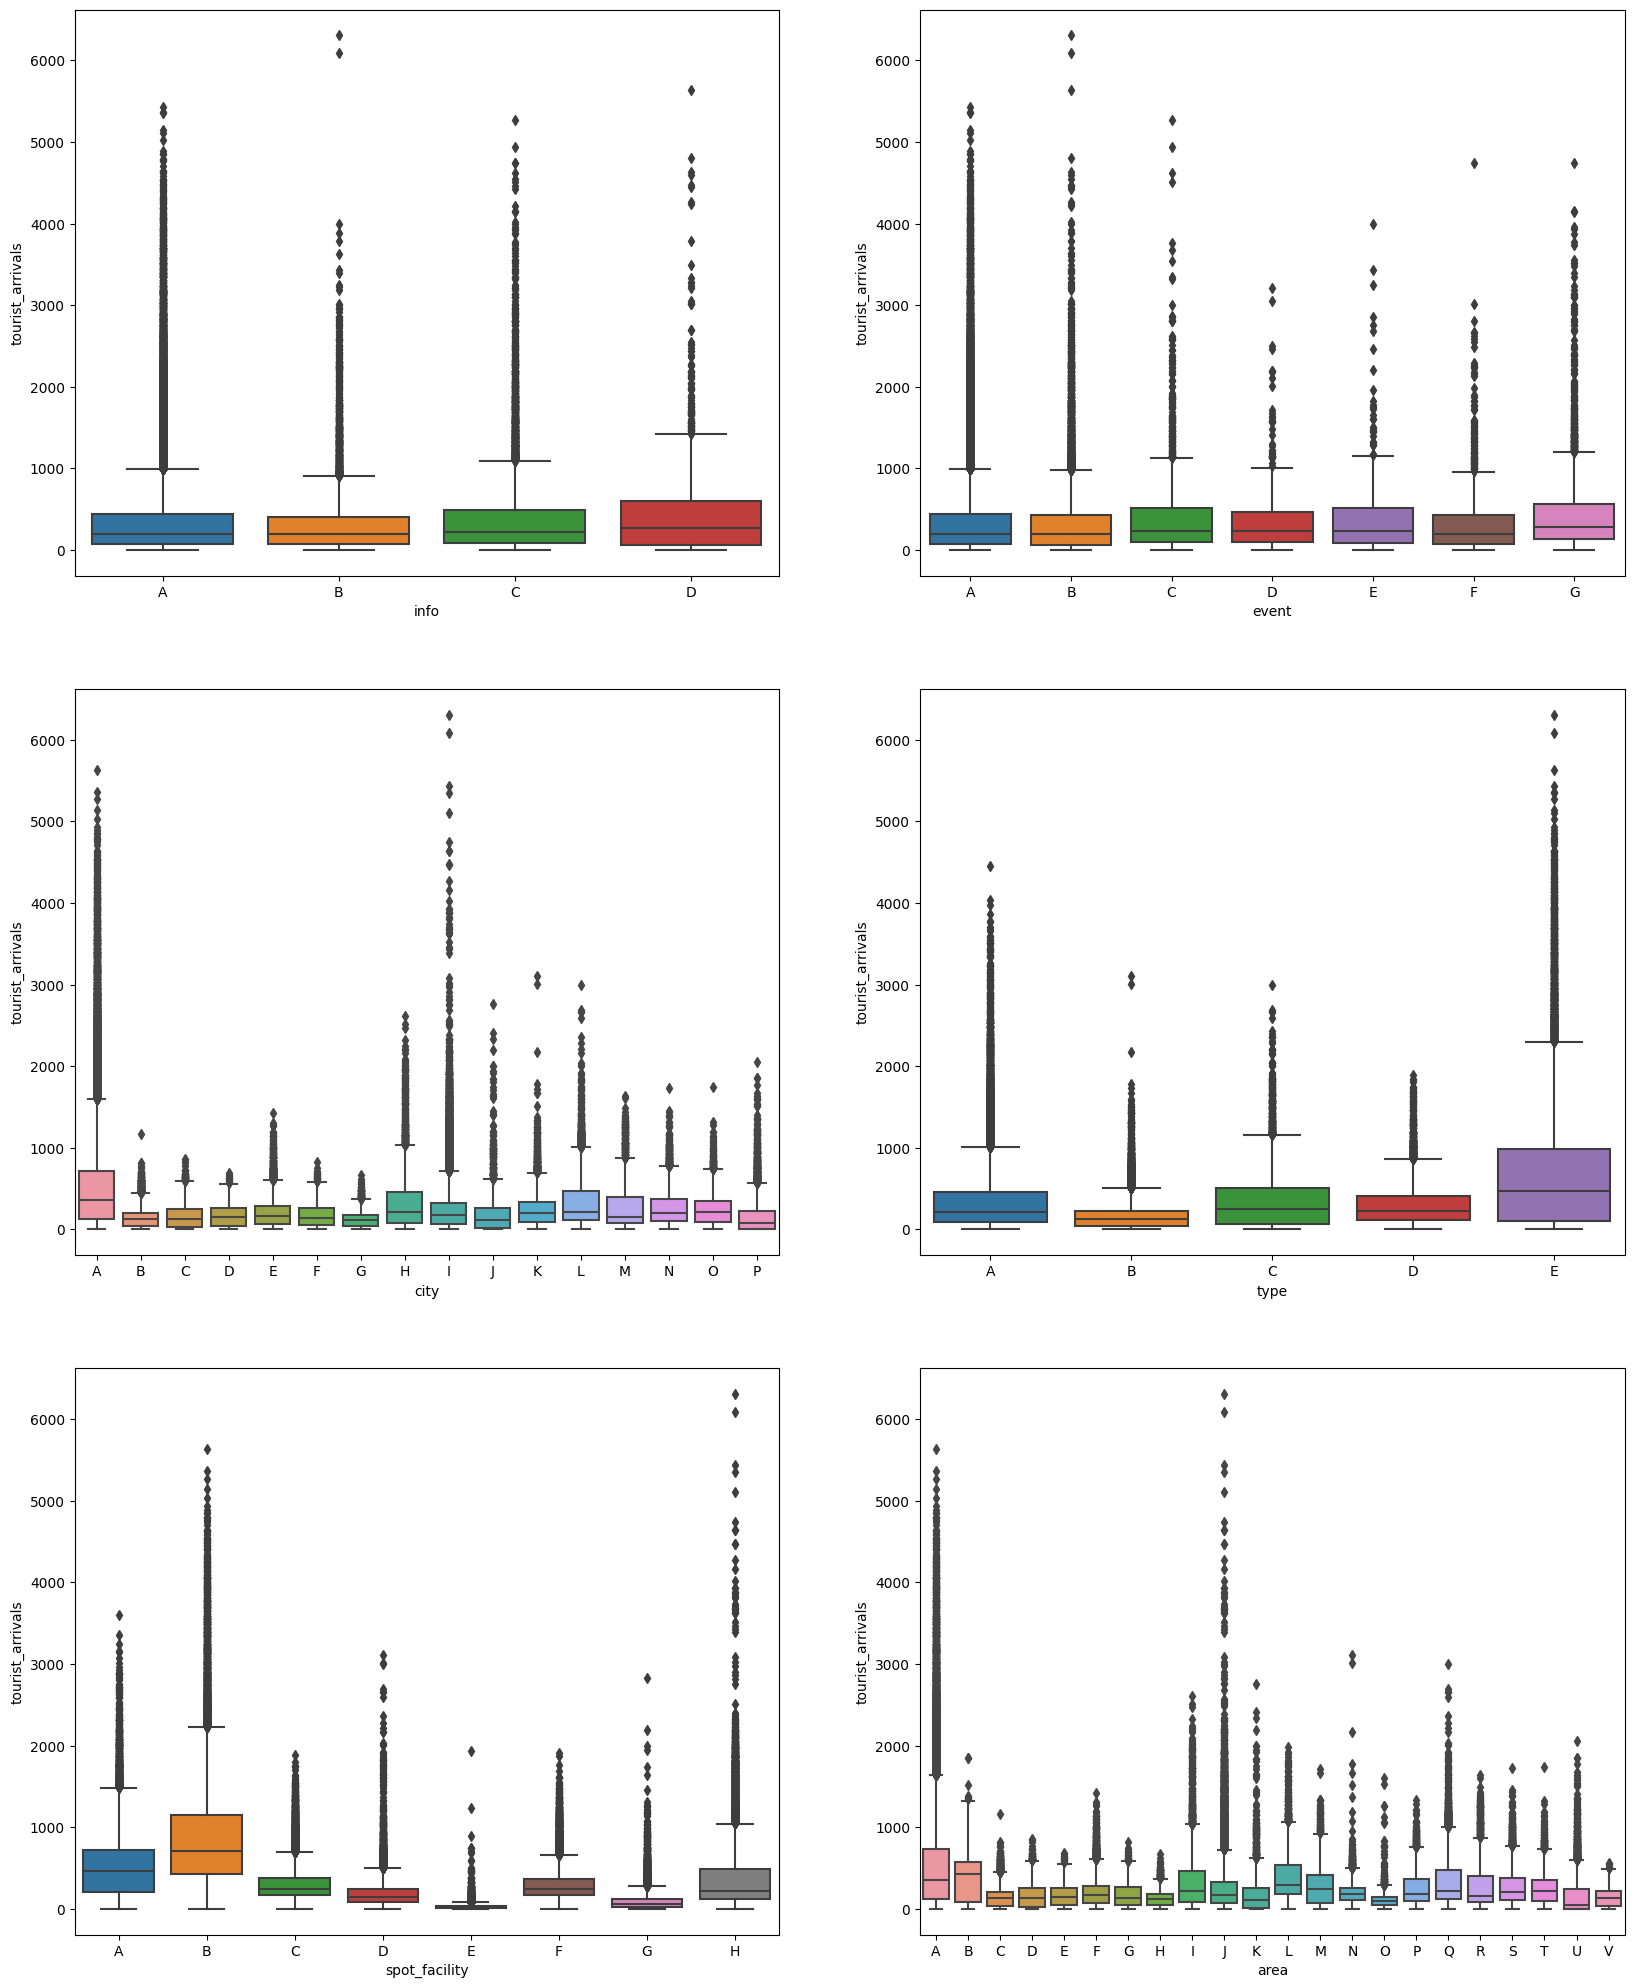

In [64]:
categoricals_cols = df[['info','event','city','type','spot_facility','area']]

plt.figure(figsize=(20,25))
for i, cols in enumerate(categoricals_cols.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, x=cols, y='tourist_arrivals')
plt.show()

<details style="background-color: yellow;">
  <summary style="color: blue;">From the plots, we get the insights that:</summary>

* Almost all events have the same average number of tourists.
* City A has the highest average number of tourist arrivals.
* Type E has the highest average tourist arrivals.
* Spot facility B has the highest average number of tourists followed by A.
* Area B has the highest average number of tourist arrivals.


</details>


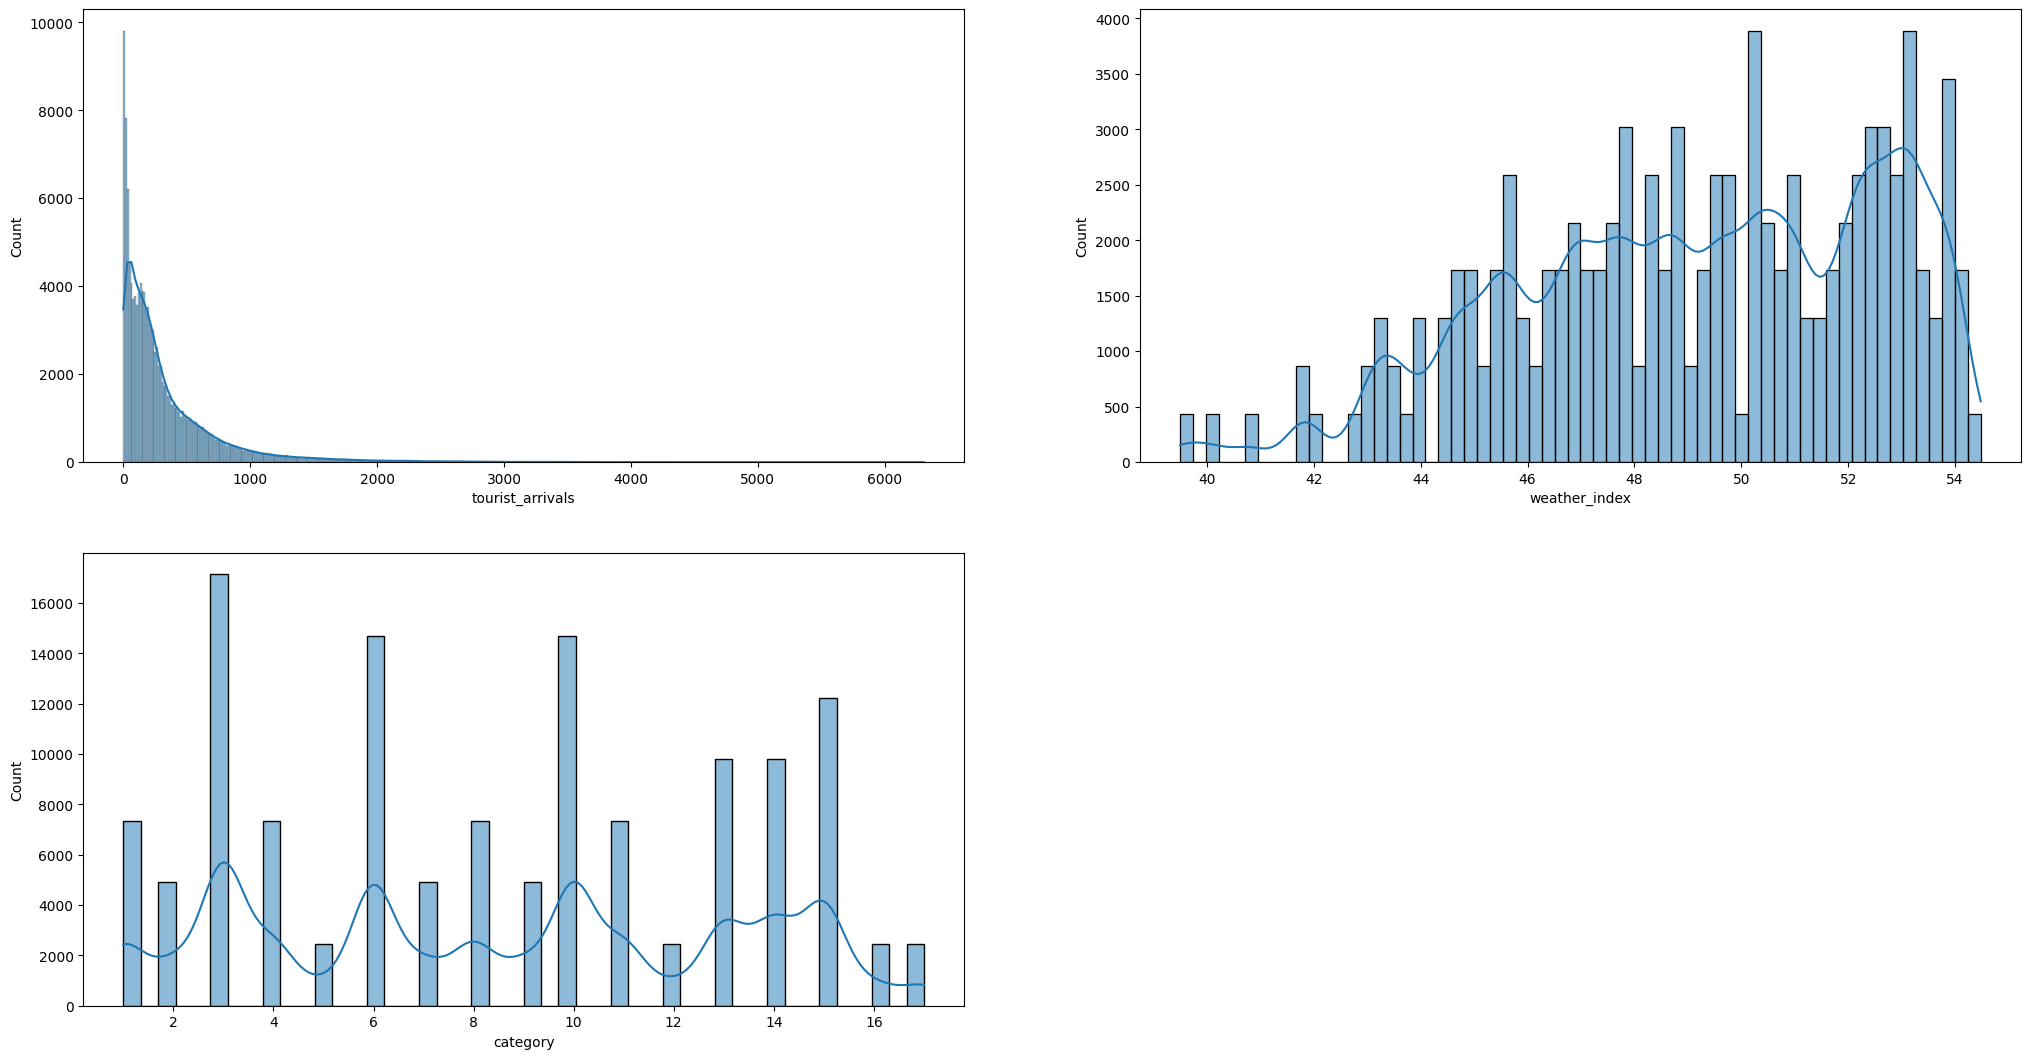

In [74]:
nums = df[['tourist_arrivals','weather_index','category']]

plt.figure(figsize=(25,20))
for i, items in enumerate(nums.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df, x=items, kde=True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9140\448763525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm")


<AxesSubplot: >

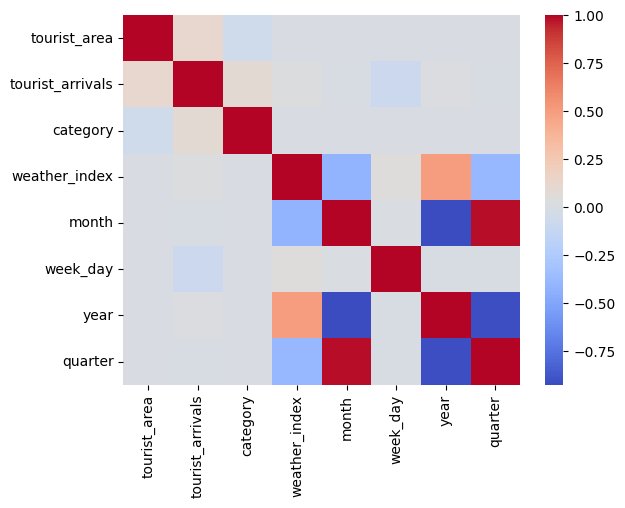

In [83]:
sns.heatmap(df.corr(), cmap="coolwarm")


<summary style="color: blue;font-size: 18px; font-weight: bold;text-decoration: underline;"><strong> Feature Engineering</strong></summary>

#### The date column has to undergo a little feature engineeringso as to extract Days, months, year weeks. This will help in gaining insights on how tourist arrivals are affected day by day.

In [75]:
df['month'] = df['date'].dt.month
df['week_day'] = df['date'].dt.day_of_week
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter

In [77]:
df1 = df.drop(columns=['date'], axis=1).copy()
df1.head()

,tourist_area,spot_facility,tourist_arrivals,area,city,type,category,info,event,weather_index,month,week_day,year,quarter
id,,,,,,,,,,,,,,
0,1,A,454,A,A,A,13,A,A,40.05,8,2,2018,3
1,1,B,823,A,A,A,13,A,A,40.05,8,2,2018,3
2,1,C,149,A,A,A,13,A,A,40.05,8,2,2018,3
3,1,D,157,A,A,A,13,A,A,40.05,8,2,2018,3
4,1,E,14,A,A,A,13,A,A,40.05,8,2,2018,3


In [78]:
cols_enc = df1[['city','spot_facility','area','type','info','event']]

columns_encoded = pd.get_dummies(data=cols_enc, drop_first=True)

df1_encoded = pd.concat([df1, columns_encoded], axis=1)

df1_encoded




,tourist_area,spot_facility,tourist_arrivals,area,city,type,category,info,event,weather_index,...,type_E,info_B,info_C,info_D,event_B,event_C,event_D,event_E,event_F,event_G
id,,,,,,,,,,,,,,,,,,,,,
0,1,A,454,A,A,A,13,A,A,40.05,...,0,0,0,0,0,0,0,0,0,0
1,1,B,823,A,A,A,13,A,A,40.05,...,0,0,0,0,0,0,0,0,0,0
2,1,C,149,A,A,A,13,A,A,40.05,...,0,0,0,0,0,0,0,0,0,0
3,1,D,157,A,A,A,13,A,A,40.05,...,0,0,0,0,0,0,0,0,0,0
4,1,E,14,A,A,A,13,A,A,40.05,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132187,9,D,149,A,A,C,6,A,A,48.29,...,0,0,0,0,0,0,0,0,0,0
132188,9,E,56,A,A,C,6,A,A,48.29,...,0,0,0,0,0,0,0,0,0,0
132189,9,F,353,A,A,C,6,A,A,48.29,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df1_encoded.drop(columns=cols_enc, axis=1, inplace=True)

In [80]:
df1_encoded['weather_index'].isna().sum()

41040

In [82]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="mean")

df1_encoded['weather_index'] = impute.fit_transform(df1_encoded[['weather_index']])

<summary style="color: blue; font-size: 18px; font-weight: bold; text-decoration: underline;"><strong>Modelling</strong></summary>


In [84]:
X = df1_encoded.drop(columns=['tourist_arrivals'], axis=1)
y = df1_encoded['tourist_arrivals']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline = LinearRegression()
baseline.fit(X_train, y_train)

LinearRegression()

In [85]:
y_preds = baseline.predict(X_test)

In [89]:
acc_score = r2_score(y_test, y_preds)
mse_score = mean_squared_error(y_test, y_preds)
rmse_score = np.sqrt(mse_score)

print(f"The accuracy score is {acc_score}")
print(f"The mean squared error is {mse_score}")
print(f"The root mean squared error is {rmse_score}")

The accuracy score is 0.5724098344854953
The mean squared error is 85668.13465756788
The root mean squared error is 292.69119333790667
